# Aprendizado Não Supervisionado

- Importando o dataset iris
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
# Importando o dataset iris
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [2]:
# Visualizando X
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [3]:
# Selecionando apenas as colunas de pétala
X1 = X.loc[:,['petal length (cm)','petal width (cm)']]

- **Visualizando graficamente os pontos**
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

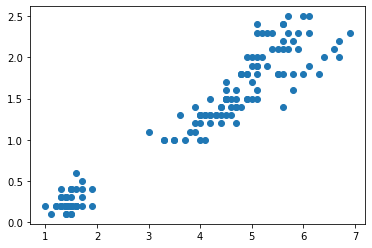

In [4]:
# Plotando esse gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'])

plt.show()

- **Utilizando o K-means**
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
# Importando o KMeans
from sklearn.cluster import KMeans

In [6]:
# Utilizando o algoritmo
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X1)

In [7]:
# Verificando quais foram os labels determinados pelo k-means
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

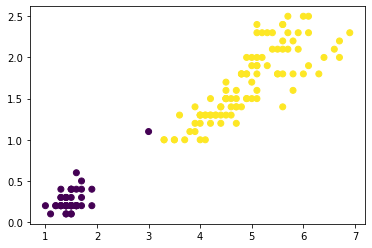

In [8]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans2.labels_)

plt.show()

- **Esse ponto distante dos pontos em roxo, deveria realmente estar como roxo?**

In [9]:
# Quem é esse ponto?
ponto = X1[X1['petal length (cm)'] == 3]
ponto

,petal length (cm),petal width (cm)
98,3.0,1.1


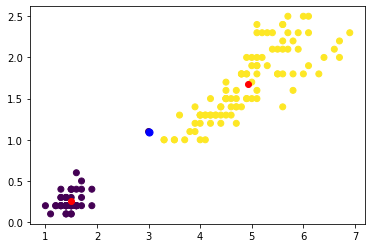

In [10]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans2.labels_)
ax.scatter(ponto['petal length (cm)'],ponto['petal width (cm)'],c='b',s=50)
ax.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],c='r')

plt.show()

- **Podemos ver os centroides de cada cluster para entender o rótulo desse ponto**

In [11]:
# Verificando os centróides
kmeans2.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [12]:
# Considerando o x e o y desse ponto
x_ponto = ponto['petal length (cm)']
y_ponto = ponto['petal width (cm)']

In [13]:
# O x e y para o ponto em roxo
x_roxo = kmeans2.cluster_centers_[0][0]
y_roxo = kmeans2.cluster_centers_[0][1]

In [14]:
# E para o ponto amarelo
x_amarelo = kmeans2.cluster_centers_[1][0]
y_amarelo = kmeans2.cluster_centers_[1][1]

In [15]:
# Podemos calcular a distância ao ponto roxo
((x_roxo-x_ponto)**2+(y_roxo-y_ponto)**2)**(1/2)

98    1.724699
dtype: float64

In [16]:
# E a distância ao ponto amarelo
((x_amarelo-x_ponto)**2+(y_amarelo-y_ponto)**2)**(1/2)

98    2.011246
dtype: float64

/Users/llucaslleall/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


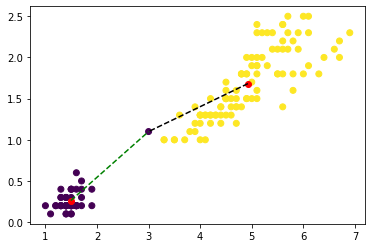

In [17]:
# Caso a gente queira, também podemos visualizar graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans2.labels_)
# ax.scatter(ponto['petal length (cm)'],ponto['petal width (cm)'],c='b',s=50)
ax.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],c='r')
ax.plot([x_roxo,x_ponto],[y_roxo,y_ponto],'--g')
ax.plot([x_amarelo,x_ponto],[y_amarelo,y_ponto],'--k')

plt.show()

<font color='blue'>**Como a distância ao centroide roxo é menor que ao centroide amarelo, esse ponto foi classificado como roxo**</font>

- **E se usarmos k = 3? E k = 4? E 5?...**

In [18]:
# Utilizando k = 3
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X1)

In [19]:
# Verificando quais foram os labels determinados pelo k-means
kmeans3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

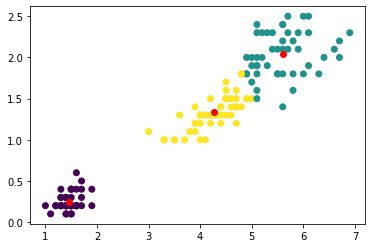

In [20]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans3.labels_)
ax.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],c='r')

plt.show()

In [21]:
# Utilizando k = 4
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X1)

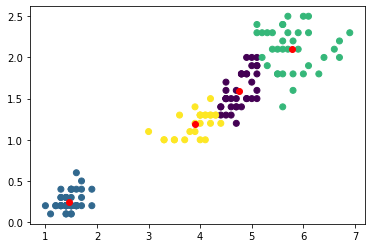

In [22]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans4.labels_)
ax.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],c='r')

plt.show()

In [23]:
# Utilizando k = 5
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(X1)

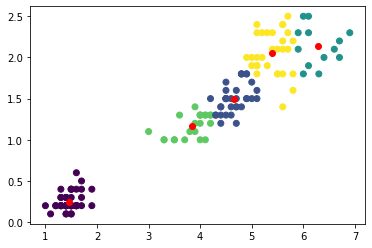

In [24]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans5.labels_)
ax.scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1],c='r')

plt.show()

In [25]:
# E se reduzirmos o k e utilizando k = 1
kmeans1 = KMeans(n_clusters=1, random_state=0).fit(X1)

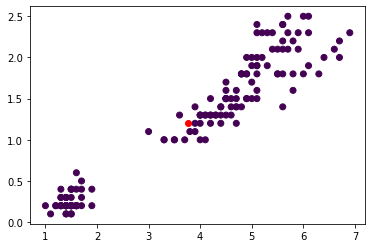

In [26]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X1['petal length (cm)'],X1['petal width (cm)'],c=kmeans1.labels_)
ax.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],c='r')

plt.show()

- **Qual o valor de k ideal?**

In [27]:
# Podemos visualizar a inércia de cada um dos k`s
i2 = kmeans2.inertia_

In [28]:
# Para k = 1
i1 = kmeans1.inertia_

In [29]:
# Para k = 3
i3 = kmeans3.inertia_

In [30]:
# Para k = 4
i4 = kmeans4.inertia_

In [31]:
# Para k = 5
i5 = kmeans5.inertia_

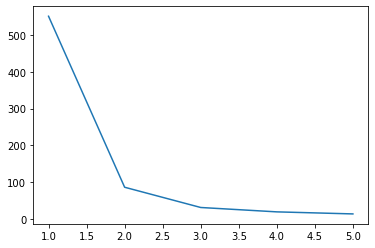

In [32]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.plot([1,2,3,4,5],[i1,i2,i3,i4,i5])

plt.show()

In [33]:
# Podemos fazer isso utilizando um laço
valores_k = []
inercias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X1)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

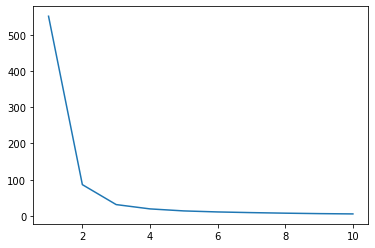

In [34]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

<font color='blue'>**Existe um cotovelo no 2, então esse é o melhor valor de k?**</font>
- Isso é apenas um direcionamento, porém o que é mais importante é <font color='blue'>**conhecermos o negócio**</font>!

In [ ]:
# Visualizando o y

In [ ]:
# Visualizando graficamente para k = 2

In [ ]:
# Visualizando graficamente para k = 3

In [ ]:
# Visualizando graficamente para k = 4

In [ ]:
# Visualizando somente os pontos na região em verde